## Custom Convnets
Design your own convnet.


### Convolutional Blocks
It does this by passing them through long chains of convolutional blocks which perform this extraction.

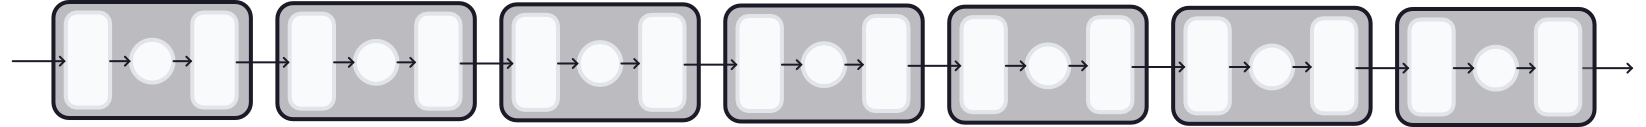

Extraction as a sequence of blocks.
These convolutional blocks are stacks of Conv2D and MaxPool2D layers, whose role in feature extraction we learned about in the last few lessons.

A kind of extraction block: convolution, ReLU, pooling.


### Example - Design a Convnet
1. Load Data
2. Define Model

    Look on the diagram of the model
    
    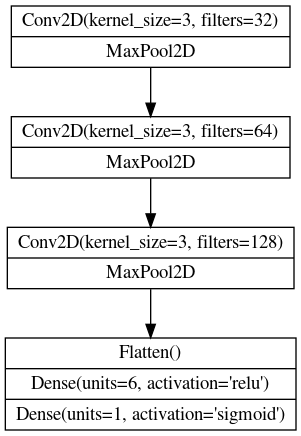

    Now we'll define the model. See how our model consists of three blocks of Conv2D and MaxPool2D layers (the base) followed by a head of Dense layers. We can translate this diagram more or less directly into a Keras Sequential model just by filling in the appropriate parameters.

    ```python
    from tensorflow import keras
    from tensorflow.keras import layers

    model = keras.Sequential([
        ## First Conv Block
        layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding="same", input_shape=[128, 128, 3]),
        layers.MaxPool2D(),

        # Second Convolutional Block
        layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
        layers.MaxPool2D(),

        # Third Convolutional Block
        layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
        layers.MaxPool2D(),

        ## Clasifier Head
        layers.Flatten()
        layers.Dense(units=6, activation="relu")
        layers.Dense(units=1, activation="sigmoid")
    ])

    model.summary()
    ```

3. Train the Model
    ```python
        model.compile(
        optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )

    history = model.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=40,
        verbose=0,
    )
    ```
    
